In [1]:
import numpy as np
from gp_regression import GaussianProcessRegression
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
np.random.seed(101)

In [2]:
# Toy data
x_min, x_max = -4, 4
x = x_min + (x_max - x_min) * np.random.rand(10)
y = np.sin(x) + np.random.multivariate_normal(np.zeros_like(x), 0.1*np.eye(len(x)))
y -= np.mean(y)

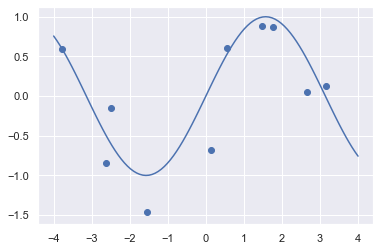

In [3]:
# True data
xs = np.linspace(-4, 4, 100)
true_ys = np.sin(xs)
true_ys -= np.mean(true_ys)

# Plot
plt.plot(xs, true_ys)
plt.scatter(x, y)

In [4]:
gpr = GaussianProcessRegression()
gpr.fit(x)
pred_mean, pred_cov = gpr.predict_dist(x, xs, y)

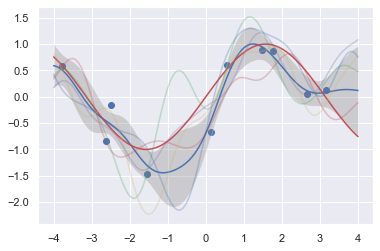

In [6]:
# Plot data and predicted mean
plt.plot(xs, pred_mean)
plt.scatter(x, y)

# True function
plt.plot(xs, true_ys, color="r")

# Standard deviation (+-2*sigma)
sigma = np.sqrt(np.diag(pred_cov))
lb = pred_mean - sigma
ub = pred_mean + sigma
plt.fill_between(xs, lb, ub, facecolor="gray", alpha=0.3)

# Some samples from predicted distribution
color = ["g","r","b","y", "m"]
for i in range(5):
    sample_ys = np.random.multivariate_normal(pred_mean, pred_cov)
    plt.plot(xs, sample_ys, color[i % len(color)], alpha=0.3)